# Import Libraries

In [1]:
from os import path

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, RocCurveDisplay

# Save models in .pkl format
from joblib import dump

import matplotlib.pyplot as plt


# Load PCA and Selected Features Datasets

In [2]:
df_pca = pd.read_csv(path.join("..", "data", "heart_disease_pca.csv"))
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,num
0,-1.087992,0.372638,1.271275,-0.240135,0.576431,0.856537,0.603891,-0.614801,-0.541453,0.245773,0.736680,0.686322,-0.640268,0.368900,0
1,-2.813771,0.807979,-0.120024,-0.558623,-0.570164,-0.825947,0.571407,0.003537,-0.490289,0.185441,0.161555,-0.754878,-0.485284,-0.437692,2
2,-2.329030,-1.089585,-0.474496,-0.027767,0.031975,1.028541,0.443364,0.631092,0.359245,0.250978,0.287731,0.055109,0.039899,0.056094,1
3,1.163143,-0.662409,1.579279,2.340236,1.617635,0.380933,-0.506575,-0.384098,-0.565434,-0.351726,0.162886,-0.532354,-0.092187,-0.393656,0
4,1.749042,-0.197127,0.929031,0.555730,0.824813,-0.459967,0.946655,0.539861,-0.350032,0.043926,-0.498762,0.214697,0.208312,0.900747,0


In [3]:
df_selected_features = pd.read_csv(path.join("..", "data", "heart_disease_selected_features.csv"))
df_selected_features.head()

,age,cp_asymptomatic,trestbps,chol,thalach,exang_yes,oldpeak,slope_upsloping,slope_flat,ca_0,ca_2,ca_3,thal_normal,thal_reversible_defect,num
0,0.936181,0.0,0.750380,-0.276443,0.017494,0.0,1.068965,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1.378929,1.0,1.596266,0.744555,-1.816334,1.0,0.381773,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2
2,1.378929,1.0,-0.659431,-0.353500,-0.899420,1.0,1.326662,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
3,-1.941680,0.0,-0.095506,0.051047,1.633010,0.0,2.099753,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,-1.498933,0.0,-0.095506,-0.835103,0.978071,0.0,0.295874,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


# Separate Features and Target and convert Target to Binary

In [4]:
X_pca = df_pca.drop(columns=["num"])
X_selected_features = df_selected_features.drop(columns=["num"])

y = df_pca["num"]

In [5]:
X_pca = df_pca.drop(columns=["num"])
X_selected_features = df_selected_features.drop(columns=["num"])

y = df_pca["num"]

In [6]:
# Convert to binary classification
y = y.apply(lambda x: 1 if x > 0 else 0)

# Check for Target Imbalance

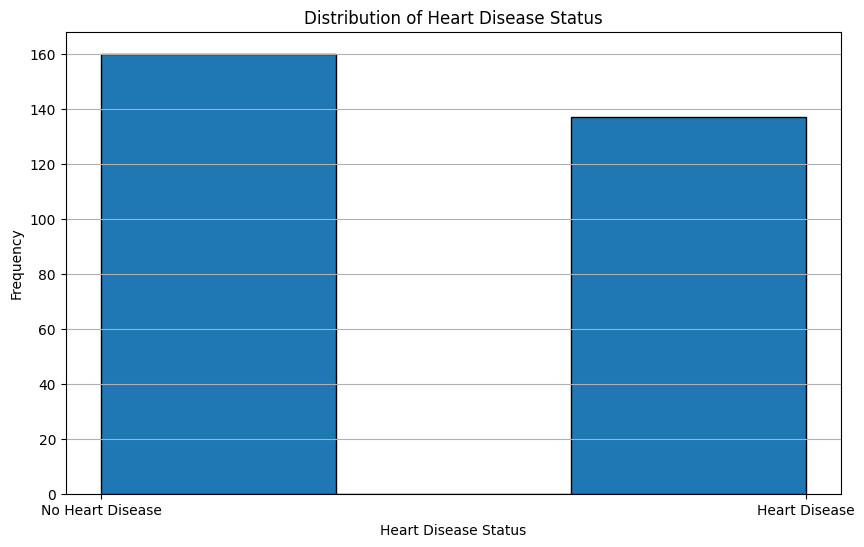

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(y, bins=3, edgecolor='k')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease Status')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Disease Status')
plt.grid(axis='y')
plt.show()

The data is slightly imbalanced.

# Split Data into Training and Testing Sets

In [8]:
# training (80%) and testing (20%) 
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

X_train_selected, X_test_selected, _, _ = train_test_split(X_selected_features, y, test_size=0.2, random_state=42)

# Train Models

## Utility Function for Training

In [9]:
def train_predict_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # For ROC AUC score, we need predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return y_pred, y_pred_proba

## Logistic Regression

In [10]:
lr_pca_model = LogisticRegression()

y_pred_lr_pca, y_pred_proba_lr_pca = train_predict_model(lr_pca_model, X_train_pca, y_train, X_test_pca)

In [11]:
lr_selected_model = LogisticRegression()

y_pred_lr_selected, y_pred_proba_lr_selected = train_predict_model(lr_selected_model, X_train_selected, y_train, X_test_selected)

## Decision Tree

In [12]:
dt_pca_model = DecisionTreeClassifier()

y_pred_dt_pca, y_pred_proba_dt_pca = train_predict_model(dt_pca_model, X_train_pca, y_train, X_test_pca)

In [13]:
dt_selected_model = DecisionTreeClassifier()

y_pred_dt_selected, y_pred_proba_dt_selected = train_predict_model(dt_selected_model, X_train_selected, y_train, X_test_selected)

## Random Forest

In [14]:
rf_pca_model = RandomForestClassifier()

y_pred_rf_pca, y_pred_proba_rf_pca = train_predict_model(rf_pca_model, X_train_pca, y_train, X_test_pca)

In [15]:
rf_selected_model = RandomForestClassifier()

y_pred_rf_selected, y_pred_proba_rf_selected = train_predict_model(rf_selected_model, X_train_selected, y_train, X_test_selected)

## Support Vector Machine (SVM)

In [16]:
svm_pca_model = SVC(probability=True)

y_pred_svm_pca, y_pred_proba_svm_pca = train_predict_model(svm_pca_model, X_train_pca, y_train, X_test_pca)

In [17]:
svm_selected_model = SVC(probability=True)

y_pred_svm_selected, y_pred_proba_svm_selected = train_predict_model(svm_selected_model, X_train_selected, y_train, X_test_selected)

# Evaluate Models

## Utility Functions for Evaluation

In [18]:
def save_evaluation(model_name, metrics, report, file_path, mode):
    with open(file_path, mode) as f:
        f.write(f"{model_name}:\n\n")
        for metric_name, value in metrics.items():
            f.write(f"{metric_name}: {value:.4f}\n")
        f.write("Classification Report:\n")
        f.write(report)
        f.write("\n" + "="*53 + "\n\n")

In [19]:
file_path = path.join("..", "results", "supervised_baseline_models_evaluation.txt")

def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    report = classification_report(y_true, y_pred, zero_division=0)

    print(f"Model: {model_name}\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(report)

    # save metrics to a text file
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }
    mode = 'a' if model_name != "Logistic Regression (PCA)" else 'w'
    save_evaluation(model_name, metrics, report, file_path, mode)

    return [accuracy, precision, recall, f1, roc_auc]

In [20]:
models_names = [
    "Logistic Regression (PCA)",
    "Logistic Regression (Selected Features)",
    "Decision Tree (PCA)",
    "Decision Tree (Selected Features)",
    "Random Forest (PCA)",
    "Random Forest (Selected Features)",
    "SVM (PCA)",
    "SVM (Selected Features)"
]

## Logistic Regression

In [21]:
lr_pca_eval = evaluate_model(y_test, y_pred_lr_pca, y_pred_proba_lr_pca, models_names[0])

Model: Logistic Regression (PCA)

Accuracy: 0.8500
Precision: 0.7586
Recall: 0.9167
F1 Score: 0.8302
ROC AUC: 0.9387
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        36
           1       0.76      0.92      0.83        24

    accuracy                           0.85        60
   macro avg       0.85      0.86      0.85        60
weighted avg       0.86      0.85      0.85        60



In [22]:
lr_sel_eval = evaluate_model(y_test, y_pred_lr_selected, y_pred_proba_lr_selected, models_names[1])

Model: Logistic Regression (Selected Features)

Accuracy: 0.8333
Precision: 0.7500
Recall: 0.8750
F1 Score: 0.8077
ROC AUC: 0.9444
              precision    recall  f1-score   support

           0       0.91      0.81      0.85        36
           1       0.75      0.88      0.81        24

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



## Decision Tree

In [23]:
dt_pca_eval = evaluate_model(y_test, y_pred_dt_pca, y_pred_proba_dt_pca, models_names[2])

Model: Decision Tree (PCA)

Accuracy: 0.7333
Precision: 0.6429
Recall: 0.7500
F1 Score: 0.6923
ROC AUC: 0.7361
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        36
           1       0.64      0.75      0.69        24

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.74      0.73      0.74        60



In [24]:
dt_sel_eval = evaluate_model(y_test, y_pred_dt_selected, y_pred_proba_dt_selected, models_names[3])

Model: Decision Tree (Selected Features)

Accuracy: 0.8167
Precision: 0.7407
Recall: 0.8333
F1 Score: 0.7843
ROC AUC: 0.8194
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.74      0.83      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



## Random Forest

In [25]:
rf_pca_eval = evaluate_model(y_test, y_pred_rf_pca, y_pred_proba_rf_pca, models_names[4])

Model: Random Forest (PCA)

Accuracy: 0.8500
Precision: 0.8000
Recall: 0.8333
F1 Score: 0.8163
ROC AUC: 0.9468
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.80      0.83      0.82        24

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.84        60
weighted avg       0.85      0.85      0.85        60



In [26]:
rf_sel_eval = evaluate_model(y_test, y_pred_rf_selected, y_pred_proba_rf_selected, models_names[5])

Model: Random Forest (Selected Features)

Accuracy: 0.8833
Precision: 0.8400
Recall: 0.8750
F1 Score: 0.8571
ROC AUC: 0.9525
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



## Support Vector Machine (SVM)

In [27]:
svm_pca_eval = evaluate_model(y_test, y_pred_svm_pca, y_pred_proba_svm_pca, models_names[6])

Model: SVM (PCA)

Accuracy: 0.9000
Precision: 0.8462
Recall: 0.9167
F1 Score: 0.8800
ROC AUC: 0.9352
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [28]:
svm_sel_eval = evaluate_model(y_test, y_pred_svm_selected, y_pred_proba_svm_selected, models_names[7])

Model: SVM (Selected Features)

Accuracy: 0.8833
Precision: 0.8696
Recall: 0.8333
F1 Score: 0.8511
ROC AUC: 0.9421
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



## ROC Curves

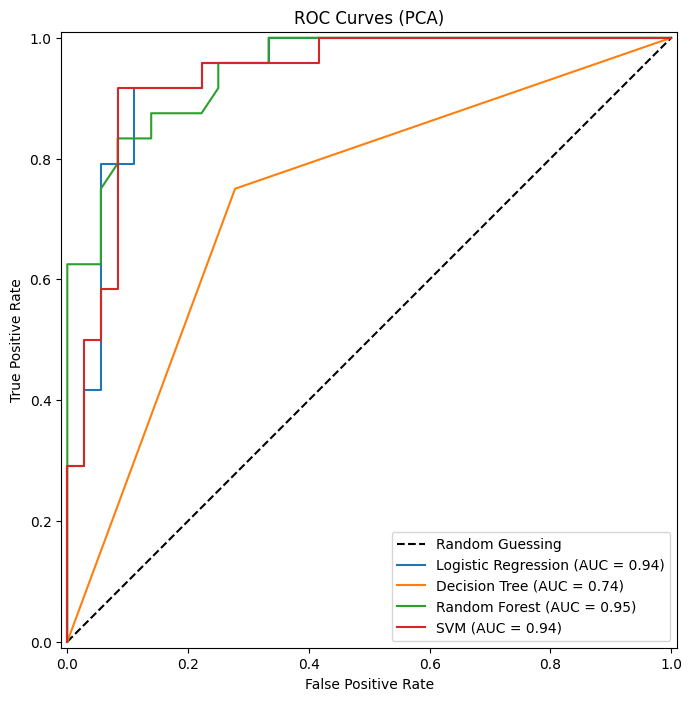

In [29]:
# display PCA ROC curves of all models in one plot
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
RocCurveDisplay.from_predictions(y_test, y_pred_proba_lr_pca, name='Logistic Regression', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_pred_proba_dt_pca, name='Decision Tree', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_pred_proba_rf_pca, name='Random Forest', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_pred_proba_svm_pca, name='SVM', ax=plt.gca())
plt.title('ROC Curves (PCA)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


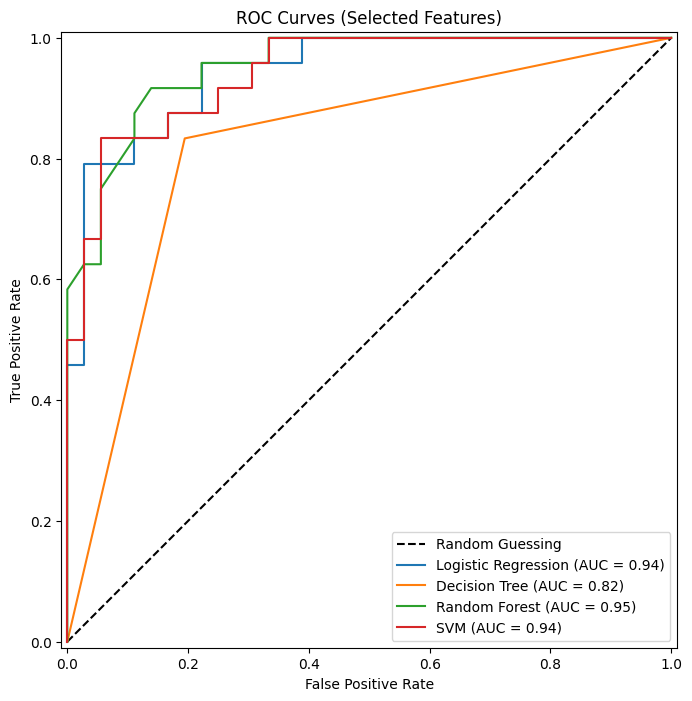

In [30]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
RocCurveDisplay.from_predictions(y_test, y_pred_proba_lr_selected, name='Logistic Regression', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_pred_proba_dt_selected, name='Decision Tree', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_pred_proba_rf_selected, name='Random Forest', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_pred_proba_svm_selected, name='SVM', ax=plt.gca())
plt.title('ROC Curves (Selected Features)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Compare Models

In [31]:
results = pd.DataFrame({
    "Model": models_names,
    "Accuracy": [
        lr_pca_eval[0], lr_sel_eval[0],
        dt_pca_eval[0], dt_sel_eval[0],
        rf_pca_eval[0], rf_sel_eval[0],
        svm_pca_eval[0], svm_sel_eval[0]
    ],
    "Precision": [
        lr_pca_eval[1], lr_sel_eval[1],
        dt_pca_eval[1], dt_sel_eval[1],
        rf_pca_eval[1], rf_sel_eval[1],
        svm_pca_eval[1], svm_sel_eval[1]
    ],
    "Recall": [
        lr_pca_eval[2], lr_sel_eval[2],
        dt_pca_eval[2], dt_sel_eval[2],
        rf_pca_eval[2], rf_sel_eval[2],
        svm_pca_eval[2], svm_sel_eval[2]
    ],
    "F1 Score": [
        lr_pca_eval[3], lr_sel_eval[3],
        dt_pca_eval[3], dt_sel_eval[3],
        rf_pca_eval[3], rf_sel_eval[3],
        svm_pca_eval[3], svm_sel_eval[3]
    ],
    "ROC AUC": [
        lr_pca_eval[4], lr_sel_eval[4],
        dt_pca_eval[4], dt_sel_eval[4],
        rf_pca_eval[4], rf_sel_eval[4],
        svm_pca_eval[4], svm_sel_eval[4]
    ]
})

# round the results to 4 decimal places
results = results.round(4)
results


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (PCA),0.8500,0.7586,0.9167,0.8302,0.9387
1,Logistic Regression (Selected Features),0.8333,0.7500,0.8750,0.8077,0.9444
2,Decision Tree (PCA),0.7333,0.6429,0.7500,0.6923,0.7361
3,Decision Tree (Selected Features),0.8167,0.7407,0.8333,0.7843,0.8194
4,Random Forest (PCA),0.8500,0.8000,0.8333,0.8163,0.9468
5,Random Forest (Selected Features),0.8833,0.8400,0.8750,0.8571,0.9525
6,SVM (PCA),0.9000,0.8462,0.9167,0.8800,0.9352
7,SVM (Selected Features),0.8833,0.8696,0.8333,0.8511,0.9421


Choose the best model based on evaluation metrics.

The priority of sorting:


  1. ROC AUC: shows discrimination ability across thresholds.

  2. Recall: most critical in medical context (catch as many patients with heart disease as possible).

  3. F1 Score: balances precision and recall; useful when data is imbalanced. 

  4. Accuracy: overall correctness, but less important if classes are imbalanced.

  5. Precision: useful if false positives are very costly (not the case here, false negatives are worse).


In [32]:
sort_metrics = ["ROC AUC", "Recall", "F1 Score", "Accuracy", "Precision"]
metrics_str = ", ".join(sort_metrics)

results.sort_values(by=sort_metrics, ascending=False, inplace=True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
5,Random Forest (Selected Features),0.8833,0.8400,0.8750,0.8571,0.9525
4,Random Forest (PCA),0.8500,0.8000,0.8333,0.8163,0.9468
1,Logistic Regression (Selected Features),0.8333,0.7500,0.8750,0.8077,0.9444
7,SVM (Selected Features),0.8833,0.8696,0.8333,0.8511,0.9421
0,Logistic Regression (PCA),0.8500,0.7586,0.9167,0.8302,0.9387
6,SVM (PCA),0.9000,0.8462,0.9167,0.8800,0.9352
3,Decision Tree (Selected Features),0.8167,0.7407,0.8333,0.7843,0.8194
2,Decision Tree (PCA),0.7333,0.6429,0.7500,0.6923,0.7361


In [33]:
# save results to supervised_baseline_evaluation_results.txt
with open(file_path, "a") as f:
    f.write(f"Summary of Model Performance (Sorted descending based on {metrics_str} respectively):\n\n")
    f.write(results.to_string(index=False))
    f.write("\n")

Best PCA features model: SVM
Logistic Regression has slightly better ROC AUC (approximately equal), also they equal in Recall, but SVM has all other metrics better.

Best selected features model: Logistic Regression as it has the better Recall and slightly better ROC AUC (approximately equal) with SVM.

# Save Best Models

In [34]:
dump(svm_pca_model, path.join("..", "models", "best_baseline_pca_model_svm.pkl"))
dump(lr_selected_model, path.join("..", "models", "best_baseline_selected_features_model_logistic_regression.pkl"))

['..\\models\\best_baseline_selected_features_model_logistic_regression.pkl']